# Environmental crimes in Colombia

In Colombia, environmental crimes encompass actions that threaten the environment and natural resources, defined by specific laws. These crimes include deforestation, wildlife trafficking, illegal exploitation of natural resources, and damage to ecosystems. The Environmental Crimes Law regulates these offenses, prescribing sanctions to safeguard the environment and conserve Colombia's resources. The legislation aims to deter harmful activities and uphold biodiversity and ecosystem protection.

Colombia's history of legislation against environmental crimes reveals a series of pivotal laws aimed at safeguarding its natural resources and addressing environmental wrongdoing. Here's an overview of key laws and milestones:

1. Decree Law 2811 of 1974: This initial legislation laid down the groundwork for environmental protection, providing a legal foundation for future environmental laws.

2. Law 99 of 1993: Also known as Colombia's General Environmental Law, this statute established the National Environmental System and introduced principles like sustainable development and environmental impact assessment.

3. Law 491 of 1999: This law focused on defining ecological insurance and crimes against natural resources, amending the Penal Code to enforce penalties for environmental offenses. It also created the National Authority of Environmental Licenses (ANLA) to regulate project impacts on the environment.

4. Law 1333 of 2009: This legislation established the National Environmental System for managing chemicals and pesticides, aiming to regulate their usage within Colombia.

5. Law 1753 of 2015: Known as the Forestry Law, this statute set the stage for sustainable forest management by creating the National Forestry System and outlining principles for responsible forestry practices.

6. Law 2111 of 2021: Dubbed the Environmental Crimes Law, this recent enactment introduced new environmental offenses and strengthened penalties for existing ones in the Penal Code. It also established the Special Directorate of Environmental Crimes to investigate and prosecute such crimes.

These laws reflect Colombia's dedication to preserving its natural heritage and combating environmental violations. They provide a legal framework for conservation efforts and establish institutions to oversee projects' environmental impacts.

Citations:   
[1] https://www.metropol.gov.co/Paginas/Noticias/colombia-tiene-nueva-ley-de-delitos-ambientales.aspx   
[2] https://www.radionacional.co/actualidad/medio-ambiente/ley-de-delitos-ambientales-cuales-son-los-delitos-en-colombia   
[3] https://bdigital.uexternado.edu.co/entities/publication/48e236da-5ae7-477c-8043-bdf31740c841   
[4] https://www.oas.org/dsd/fida/laws/legislation/colombia/colombia_99-93.pdf   
[5] https://www.minambiente.gov.co/recuerde-cuales-son-los-delitos-ambientales-que-se-penalizan-en-colombia/   

**Preguntas de investigación**  

Cual es el delito más frecuentes en el medio ambiente en los últimos 5 años?   
En que año se identificaron la mayor cantidad de delitos?   
Tienen los delitos una componente estacional?   
Se ha identificado una reducción en los delitos contra el medio ambiente con el tiempo?   
Cual es la región con mayor delitos contra el medio ambiente en los últimos 5 años?   
En que regiones predominan los diferentes delitos contra el medio ambiente en los últimos 5 años?    
Hay delitos que se encuentran correlacionados?   
Qué delitos se esperan se incrementen en el tiempo?
cuales son los delitos más frecuentes en una region?


**Importando librerias**

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import unidecode

import numpy as np
import folium
from folium.plugins import HeatMap
import leafmap.foliumap as leafmap

import seaborn as sns

**Dataset**

The dataset contains information related to environmental crimes or incidents in Colombia. Here's a breakdown of what each column might represent:

1. **FECHA HECHO**: The date or timestamp when the environmental incident or crime occurred.

2. **COD_DEPTO**:  A numerical code representing the department (administrative division) where the incident took place.

3. **DEPARTAMENTO**: The name of the department where the incident occurred.

4. **COD_MUNI**:  A numerical code representing the municipality (subdivision of a department) where the incident took place.

5. **MUNICIPIO**: The name of the municipality where the incident occurred.

6. **DESCRIPCION_CONDUCTA**: It describes the nature or type of environmental conduct or offense that occurred, such as deforestation, wildlife trafficking, or illegal exploitation.

7. **ZONA**: The geographical zone or area where the incident occurred, such as rural, urban, forested, etc.

8. **CANTIDAD**: the quantity or magnitude associated with the environmental crime or incident, depending on the context. For example, it might indicate the number of trees illegally felled or the volume of pollutants discharged.

**Leyendo base de datos**

In [2]:
df = pd.read_csv("DELITOS_CONTRA_EL_MEDIO_AMBIENTE.csv")
df.head()

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,DESCRIPCION_CONDUCTA,ZONA,CANTIDAD
0,01/01/2003 12:00:00 AM,5,ANTIOQUIA,5120,CACERES,ARTÍCULO 336. CAZA ILEGAL,URBANA,1
1,01/02/2003 12:00:00 AM,5,ANTIOQUIA,5250,EL BAGRE,ARTÍCULO 328. ILÍCITO APROVECHAMIENTO DE LOS R...,URBANA,1
2,01/03/2003 12:00:00 AM,5,ANTIOQUIA,5142,CARACOLI,ARTÍCULO 328. ILÍCITO APROVECHAMIENTO DE LOS R...,URBANA,1
3,01/03/2003 12:00:00 AM,5,ANTIOQUIA,5154,CAUCASIA,ARTÍCULO 328. ILÍCITO APROVECHAMIENTO DE LOS R...,URBANA,1
4,01/03/2003 12:00:00 AM,5,ANTIOQUIA,5390,LA PINTADA,ARTÍCULO 336. CAZA ILEGAL,URBANA,1


Número de registros

In [3]:
print("Number of registries ", df.shape[0])

Number of registries  65696


**Validation of dominio of each column**  

the "domain of a column" refers to the set of all possible values that can be stored in that specific column of a database table. It defines the range or scope of acceptable values for the data within that column. The domain of a column is determined by the data type and any constraints defined on that column, such as a range of numeric values, a list of permissible values, or specific formatting requirements. Understanding the domain of a column is essential for ensuring data integrity and consistency within the database.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65696 entries, 0 to 65695
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   FECHA HECHO           65696 non-null  object
 1   COD_DEPTO             65696 non-null  int64 
 2   DEPARTAMENTO          65696 non-null  object
 3   COD_MUNI              65696 non-null  int64 
 4   MUNICIPIO             65696 non-null  object
 5   DESCRIPCION_CONDUCTA  65696 non-null  object
 6   ZONA                  65696 non-null  object
 7   CANTIDAD              65696 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 4.0+ MB


In [5]:
df.ZONA.unique()

array(['URBANA', 'RURAL'], dtype=object)

**Decomposition of FECHA_HECHO in days, months and years**

Breaking down the "FECHA_HECHO" column into days, months, and years is crucial for several reasons. Firstly, it allows for a more granular analysis of temporal patterns in environmental incidents or crimes. By dissecting the date into these components, researchers or analysts can identify trends, seasonal variations, or long-term patterns in the occurrence of such events. For instance, it enables them to discern whether certain types of environmental offenses are more prevalent during specific months or years.   

Additionally, decomposing the date facilitates the comparison of incident frequencies across different time intervals. This can aid in assessing the effectiveness of environmental policies, enforcement strategies, or conservation efforts over time. 

In [6]:
df["fecha"] = pd.to_datetime(df["FECHA HECHO"])
df["month"] = df.fecha.dt.month
df["year"] = df.fecha.dt.year
df["day"] = df.fecha.dt.day
df.head()

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,DESCRIPCION_CONDUCTA,ZONA,CANTIDAD,fecha,month,year,day
0,01/01/2003 12:00:00 AM,5,ANTIOQUIA,5120,CACERES,ARTÍCULO 336. CAZA ILEGAL,URBANA,1,2003-01-01,1,2003,1
1,01/02/2003 12:00:00 AM,5,ANTIOQUIA,5250,EL BAGRE,ARTÍCULO 328. ILÍCITO APROVECHAMIENTO DE LOS R...,URBANA,1,2003-01-02,1,2003,2
2,01/03/2003 12:00:00 AM,5,ANTIOQUIA,5142,CARACOLI,ARTÍCULO 328. ILÍCITO APROVECHAMIENTO DE LOS R...,URBANA,1,2003-01-03,1,2003,3
3,01/03/2003 12:00:00 AM,5,ANTIOQUIA,5154,CAUCASIA,ARTÍCULO 328. ILÍCITO APROVECHAMIENTO DE LOS R...,URBANA,1,2003-01-03,1,2003,3
4,01/03/2003 12:00:00 AM,5,ANTIOQUIA,5390,LA PINTADA,ARTÍCULO 336. CAZA ILEGAL,URBANA,1,2003-01-03,1,2003,3


**Looking for missing values**  

Detecting missing values in a dataset is crucial for ensuring data integrity, accurate analyses, and reliable machine learning models. Addressing these gaps helps maintain completeness and quality, leading to more trustworthy results and fostering transparency in research.

In [7]:
df.isnull().sum()

FECHA HECHO             0
COD_DEPTO               0
DEPARTAMENTO            0
COD_MUNI                0
MUNICIPIO               0
DESCRIPCION_CONDUCTA    0
ZONA                    0
CANTIDAD                0
fecha                   0
month                   0
year                    0
day                     0
dtype: int64

**Conclusions** no missing values detected

**Text cleaning** 

Text cleaning, including the removal of special characters, is crucial for ensuring data consistency, improving text processing, reducing noise, normalizing data, enhancing model performance, and improving readability. It is a fundamental preprocessing step in text analysis pipelines that significantly impacts the quality and effectiveness of downstream tasks and applications.

In [8]:
# Removing number of articles in each description
df["ilicit"] = df["DESCRIPCION_CONDUCTA"].apply(lambda x:  x.split(".")[1])
# Removal of special characters with accents.
df["ilicit"] = df["ilicit"].apply(lambda x: unidecode.unidecode(x.strip()))

**Validation of ilicit behavior is unique**  

Each illegal crime in the dataset is associated with only one unique subtitle or category. This ensures that there are no duplicate or redundant subtitles linked to the same criminal activity. Having a unique subtitle for each illegal behavior enhances the clarity and organization of the dataset, preventing confusion and facilitating accurate analysis of the data

In [9]:
df["ilicit"] = df["ilicit"].apply(lambda x: "MANEJO Y USO ILICITO DE ORGANISMOS" if "MANEJO Y USO ILICITO DE ORGANISMOS" in x else x)
df["ilicit"] = df["ilicit"].apply(lambda x: "PESCA ILEGAL"  if "PESCA" in x else x)
df["ilicit"] = df["ilicit"].apply(lambda x: "DANOS EN LOS RECURSOS NATURALES Y ECOCIDIO" if "DANOS EN LOS RECURSOS NATURALES" in x else x)
df["ilicit"] = df["ilicit"].apply(lambda x: "APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES" if "APROVECHAMIENTO" in x else x )
df["ilicit"] = df["ilicit"].apply(lambda x: "CONTAMINACION AMBIENTAL" if "CONTAMINACION AMBIENTAL" in x else x )
df["ilicit"] = df["ilicit"].apply(lambda x: "INVASION Y FINANCIACION DE AREAS DE ESPECIAL IMPORTANCIA ECOLOGICA" if "IMPORTANCIA ECOLOGICA" in x else x )
df["ilicit"] = df["ilicit"].apply(lambda x: "DEFORESTACION" if "DEFORESTACION" in x else x )

df.groupby("ilicit")["day"].count()


ilicit
APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES             38375
CAZA ILEGAL                                                               6334
CONTAMINACION AMBIENTAL                                                   3028
DANOS EN LOS RECURSOS NATURALES Y ECOCIDIO                                6163
DEFORESTACION                                                                9
EXPERIMENTACION ILEGAL CON ESPECIES, AGENTES BIOLOGICOS O BIOQUIMICOS       21
EXPLOTACION ILICITA DE YACIMIENTO MINERO Y OTROS MATERIALES              10381
INVASION Y FINANCIACION DE AREAS DE ESPECIAL IMPORTANCIA ECOLOGICA         329
MANEJO ILICITO DE ESPECIES EXOTICAS                                         54
MANEJO Y USO ILICITO DE ORGANISMOS                                           3
PESCA ILEGAL                                                               980
TRAFICO DE FAUNA                                                            19
Name: day, dtype: int64

**Time period in the dataset**

In [10]:
print("Period from ", df.fecha.min(), " to ", df.fecha.max())

Period from  2003-01-01 00:00:00  to  2022-05-31 00:00:00


In [11]:
df.to_csv("DELITOS_CONTRA_EL_MEDIO_AMBIENTE_clean.csv", index=False,sep=";")

### Exploratory Data Analysis

In [12]:
df1 = df.copy()

**What is the most common environmental crime?**

APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES             58.412993
EXPLOTACION ILICITA DE YACIMIENTO MINERO Y OTROS MATERIALES              15.801571
CAZA ILEGAL                                                               9.641378
DANOS EN LOS RECURSOS NATURALES Y ECOCIDIO                                9.381089
CONTAMINACION AMBIENTAL                                                   4.609109
PESCA ILEGAL                                                              1.491719
INVASION Y FINANCIACION DE AREAS DE ESPECIAL IMPORTANCIA ECOLOGICA        0.500792
MANEJO ILICITO DE ESPECIES EXOTICAS                                       0.082197
EXPERIMENTACION ILEGAL CON ESPECIES, AGENTES BIOLOGICOS O BIOQUIMICOS     0.031965
TRAFICO DE FAUNA                                                          0.028921
DEFORESTACION                                                             0.013699
MANEJO Y USO ILICITO DE ORGANISMOS                                        0.004566
Name

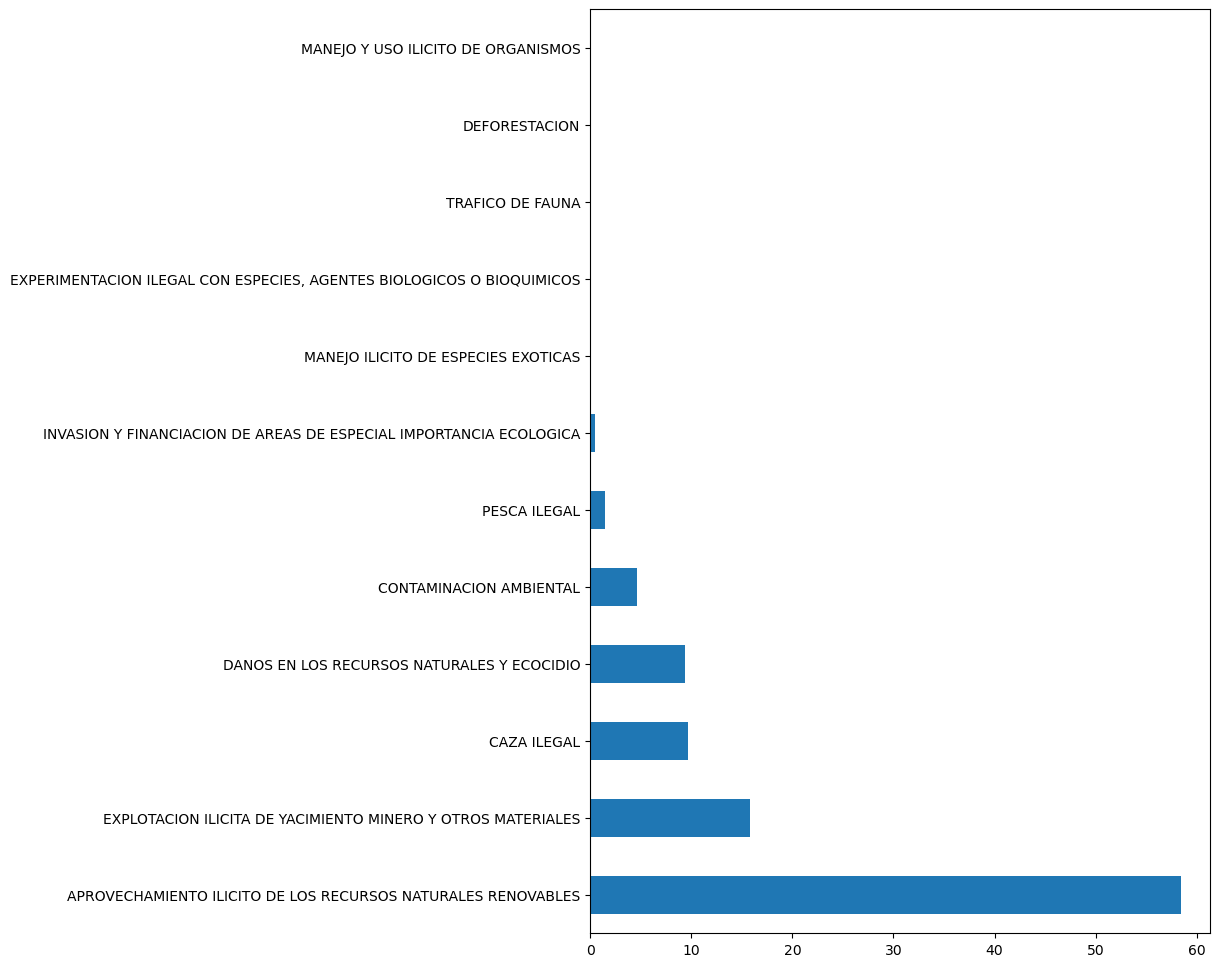

In [13]:
df2=df1["ilicit"].value_counts()*100/df1.shape[0]
plt.figure(figsize=(8,12))
df2.plot(kind="barh")
df2.head(32)

Here are some conclusions for a non-technical audience based on the provided data:

1. **Illegal Exploitation of Renewable Natural Resources**: This is the most prevalent illegal activity concerning natural resources, indicating a significant issue with the unauthorized use or extraction of renewable resources.

2. **Illegal Mining and Other Material Exploitation**: While not as widespread as the exploitation of renewable resources, illegal mining and material exploitation still pose a notable concern for environmental protection and resource conservation.

3. **Illegal Hunting and Damage to Natural Resources**: The illegal hunting of wildlife and the damage to natural resources, including ecocide, are substantial problems that need attention to preserve biodiversity and ecosystem health.

4. **Environmental Pollution**: Pollution is a significant issue, albeit with a lower frequency compared to other illegal activities. However, it still requires action to mitigate its harmful effects on the environment and human health.

5. **Other Illegal Activities**: There are also instances of illegal fishing, invasion of ecologically important areas, and illicit handling of exotic species and organisms, although these occur less frequently compared to other crimes.

These conclusions highlight the diverse range of illegal activities impacting natural resources and the environment. Addressing these issues requires collaborative efforts from policymakers, law enforcement agencies, and the public to enforce regulations, promote sustainable practices, and protect ecosystems for future generations.


**In what year were the most crimes identified?**

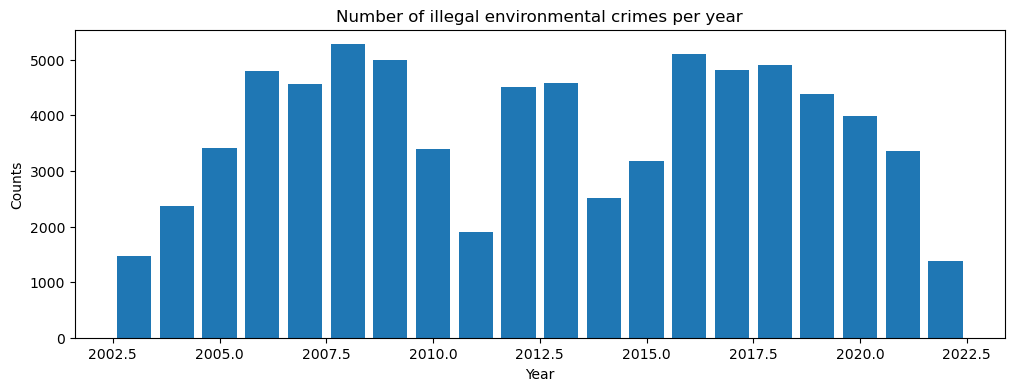

In [14]:
df3 = df.groupby("year")["CANTIDAD"].sum().reset_index()
plt.figure(figsize=(12,4))
plt.title("Number of illegal environmental crimes per year")
plt.bar(df3.year,df3.CANTIDAD)
plt.xlabel("Year")
plt.ylabel("Counts")
plt.show()

**Conclusions**

1. **Trends in Environmental Incidents Over Time**: The data shows fluctuations in the number of environmental incidents over the years. There is a noticeable increase from 2003 to 2009, followed by a decrease in 2010. This suggests varying levels of environmental activity and possibly changes in enforcement or reporting mechanisms during this period.

2. **Peak Years and Plateaus**: Some years stand out as peak years for environmental incidents, such as 2006, 2008, 2013, and 2016, where the number of incidents is notably higher compared to adjacent years. However, there are also plateau periods, such as 2010 to 2012, where the number of incidents remains relatively stable.

3. **Recent Trends**: In recent years, from 2017 to 2022, there appears to be a general trend of decreasing environmental incidents, with a slight uptick in 2018 and 2019 followed by a decline in 2020 and 2021. This trend may indicate improved environmental policies, enforcement efforts, or public awareness leading to fewer incidents.



**How is the distribution of illegal crimes per year?**

knowing the distribution of illegal crimes per year is essential for informed decision-making, effective resource allocation, policy evaluation, risk assessment, and public engagement in environmental protection efforts.

In [17]:
df4 = df.groupby(["year","ilicit"])["day"].count().reset_index()
df4.to_excel("test.xlsx")
lista = df.ilicit.unique()

CAZA ILEGAL
APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES
DANOS EN LOS RECURSOS NATURALES Y ECOCIDIO
PESCA ILEGAL
EXPLOTACION ILICITA DE YACIMIENTO MINERO Y OTROS MATERIALES
EXPERIMENTACION ILEGAL CON ESPECIES, AGENTES BIOLOGICOS O BIOQUIMICOS
CONTAMINACION AMBIENTAL
INVASION Y FINANCIACION DE AREAS DE ESPECIAL IMPORTANCIA ECOLOGICA
MANEJO Y USO ILICITO DE ORGANISMOS
MANEJO ILICITO DE ESPECIES EXOTICAS
TRAFICO DE FAUNA
DEFORESTACION


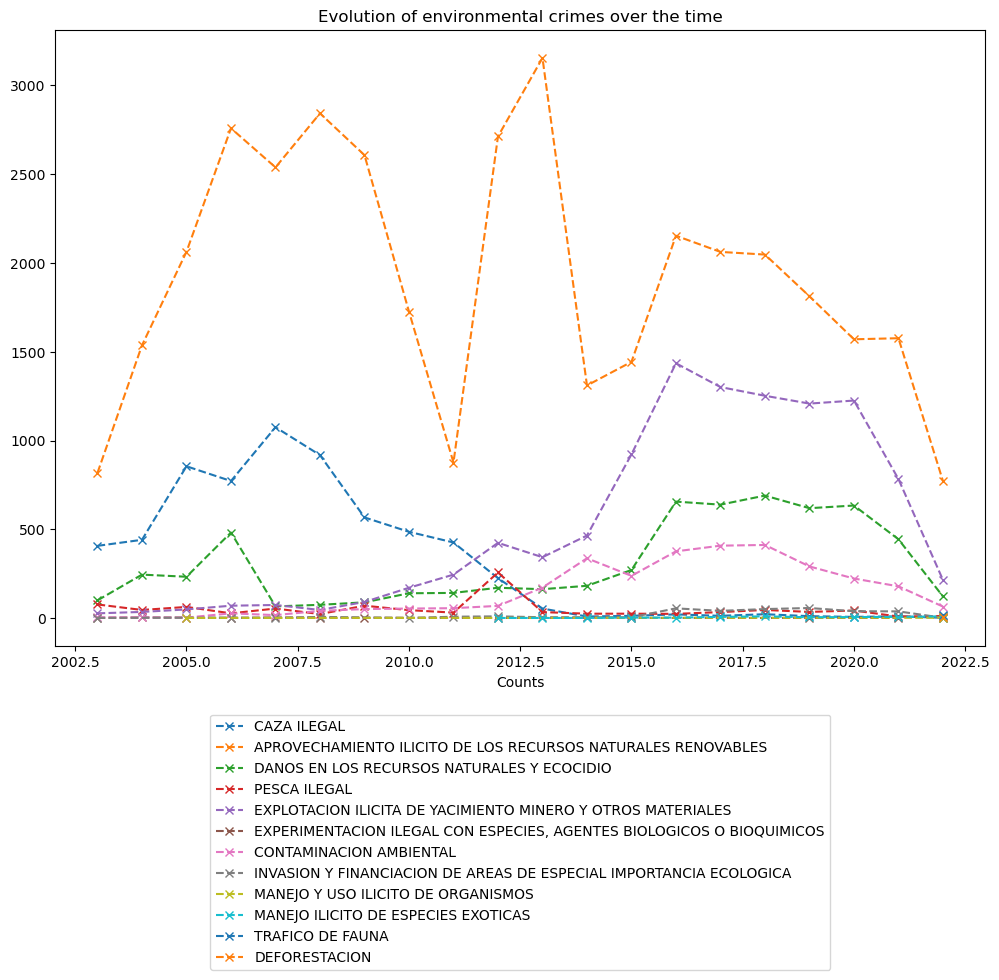

In [18]:
plt.figure(figsize=(12,8))
plt.title("Evolution of environmental crimes over the time")
for lista_ in lista:
    print(lista_)
    
    dftemp = df4[df4["ilicit"] == lista_]
    plt.plot(dftemp.year, dftemp.day,label=lista_,marker="x",linestyle="--")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1)
plt.xlabel("Years")
plt.xlabel("Counts")
plt.show()

The data shows fluctuations in different types of illegal activities over the years. For instance, "APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES" fluctuates but generally remains high throughout the years, indicating persistent issues in the exploitation of renewable natural resources.
"CAZA ILEGAL" (illegal hunting) shows variations but remains a significant concern, particularly in the mid-2000s and early 2010s, before declining in later years.
"CONTAMINACION AMBIENTAL" (environmental pollution) fluctuates but generally shows a decreasing trend over the years, suggesting potential improvements in pollution control measures.
"DANOS EN LOS RECURSOS NATURALES Y ECOCIDIO" (damage to natural resources and ecocide) exhibits fluctuations, with peaks in certain years, indicating sporadic but significant incidents of environmental damage.

Here are some conclusions:

1. **Identifying Priority Areas**: Analyzing the distribution of illegal crimes per year helps identify priority areas for intervention. For instance, in 2006, there was a significant increase in "DANOS EN LOS RECURSOS NATURALES Y ECOCIDIO," suggesting a need for targeted efforts to address environmental damage during that period.

2. **Monitoring Progress**: Tracking the distribution of illegal crimes over time allows for the monitoring of progress in environmental conservation efforts. For example, a decrease in "CONTAMINACION AMBIENTAL" from 2007 to 2009 indicates potential success in pollution control measures during those years.

3. **Resource Allocation**: Understanding the distribution of illegal crimes per year assists in allocating resources effectively. Decision-makers can allocate resources to address prevalent issues, such as "APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES," which consistently appears as a significant concern across multiple years.

4. **Policy Evaluation**: The data enables decision-makers to evaluate the effectiveness of environmental policies and regulations. For instance, if there is a decrease in "CAZA ILEGAL" following the implementation of stricter hunting regulations, it suggests that the policies may be having a positive impact.

5. **Community Engagement**: Sharing insights from the distribution of illegal crimes per year can help engage the community in environmental conservation efforts. By raising awareness about prevalent issues and encouraging community involvement, decision-makers can foster a sense of ownership and responsibility towards protecting natural resources.

Overall, analyzing the distribution of illegal crimes per year provides valuable insights for decision-making, resource allocation, policy evaluation, and community engagement in environmental conservation efforts.

**Has there been a reduction in environmental crimes over time?**

The data on "Illegal Exploitation of Renewable Natural Resources" shows a fluctuating trend in the number of crimes over the years. There was a general increase in these crimes from 2003 to 2013, reaching a peak in 2013 with 3154 cases. However, since 2014, there has been a notable decrease in the number of these crimes, with lower figures compared to the peak year. In 2022, there was a significant drop to 772 cases, indicating a substantial reduction in illicit activities related to the exploitation of renewable natural resources compared to previous years. This suggests that efforts to combat these crimes may be having a positive impact, leading to a decrease in such illegal activities over time.

The data shows a significant reduction in illegal or poaching hunting over the years, with a peak of 3154 cases in 2013 and a significant decrease to 2 cases in 2022. This suggests that efforts to combat illegal hunting and protect wildlife have been successful in reducing the number of incidents.

**Which is the region with the highest environmental crimes?**

In [19]:
df.groupby("DEPARTAMENTO")["ilicit"].count().sort_values()

DEPARTAMENTO
SAN ANDRÉS ISLAS         78
VAUPÉS                  127
VICHADA                 190
GUAINÍA                 203
ARAUCA                  259
QUINDÍO                 260
AMAZONAS                279
PUTUMAYO                551
CAUCA                   639
CHOCÓ                   665
LA GUAJIRA              758
GUAVIARE                973
CAQUETÁ                 981
CASANARE               1019
HUILA                  1073
ATLÁNTICO              1084
NARIÑO                 1091
RISARALDA              1127
META                   1349
CESAR                  1515
SUCRE                  1719
BOYACÁ                 1800
CUNDINAMARCA           2077
MAGDALENA              2150
TOLIMA                 2160
BOGOTÁ D.C.            2164
BOLÍVAR                2783
NORTE DE SANTANDER     3026
VALLE DEL CAUCA        3206
SANTANDER              3234
CÓRDOBA                4644
CALDAS                 7172
ANTIOQUIA             15340
Name: ilicit, dtype: int64

**Conclusions**

1. **Regional Disparities**: There are significant disparities in the number of illicit crimes across different regions of the country. For example, while some regions like San Andrés Islas, Vaupés, and Vichada report relatively low numbers of illicit crimes, others like Antioquia, Caldas, and Córdoba have much higher rates.

2. **High Incidence Areas**: Regions such as Córdoba, Caldas, and Antioquia stand out for having exceptionally high numbers of illicit crimes. These areas may require targeted interventions and resource allocation to address the root causes of illegal activities effectively.

3. **Urban vs. Rural Dynamics**: It's notable that both urban and rural regions are affected by illicit crimes. While Bogotá D.C. reports a high number of illicit crimes, so do rural areas like Norte de Santander and Valle del Cauca. This suggests that illicit activities are not confined to specific geographical settings but may vary in nature based on the region.

4. **Potential Hotspots**: Regions with particularly high numbers of illicit crimes, such as Norte de Santander, Valle del Cauca, and Santander, may be considered potential hotspots for further investigation and targeted law enforcement efforts to combat illegal activities effectively.

5. **Resource Allocation**: Decision-makers may need to prioritize resource allocation based on the severity and prevalence of illicit crimes in each region. Regions with higher crime rates may require more resources for law enforcement, community engagement, and social programs aimed at addressing underlying issues contributing to illegal activities.

In summary, understanding the distribution of illicit crimes per region is crucial for designing effective strategies to combat illegal activities, promote safety, and ensure the well-being of communities across Colombia.

**Evolution of the amount of illegal crime activities per departments over the years**

In [23]:
df4 = df[["DEPARTAMENTO","year","CANTIDAD"]].copy()
pivot = df4.pivot_table(index=['DEPARTAMENTO'], columns=["year"],values=['CANTIDAD'], aggfunc='sum')
pivot.fillna(0.0,inplace=True)
pivot.to_excel("departments over years.xlsx")
print(pivot)

                   CANTIDAD                                                  \
year                   2003    2004    2005    2006    2007    2008    2009   
DEPARTAMENTO                                                                  
AMAZONAS                2.0     5.0     5.0     2.0     5.0    14.0    13.0   
ANTIOQUIA            1003.0  1171.0  1514.0  1024.0  1162.0  1036.0  1082.0   
ARAUCA                  1.0     0.0    22.0    18.0    11.0     8.0     5.0   
ATLÁNTICO              43.0    45.0    61.0    49.0    40.0    18.0    29.0   
BOGOTÁ D.C.             2.0     1.0     1.0     2.0     2.0  1132.0  1157.0   
BOLÍVAR                23.0    40.0    63.0    60.0    46.0    80.0    87.0   
BOYACÁ                  0.0     5.0    40.0    31.0    69.0    49.0    42.0   
CALDAS                 63.0    94.0   422.0  1558.0  1615.0  1550.0  1716.0   
CAQUETÁ                 0.0     0.0     6.0    14.0     9.0     2.0     5.0   
CASANARE                9.0     3.0    65.0    62.0 

To draw conclusions about trends based on the provided data, we can analyze the changes in the number of reported cases per department over the years. Here are some observations:

1. **Overall Increase in Reported Cases**: Across many departments, there is a noticeable increase in reported cases over the years. This could be due to improved reporting mechanisms, increased awareness, or actual increases in crime rates.

2. **Significant Fluctuations**: Some departments show significant fluctuations in reported cases from year to year. For example, Antioquia, Bolívar, and Valle del Cauca have notable fluctuations in the number of reported cases over the years, indicating possible variations in crime rates or changes in reporting practices.

3. **Stability in Some Regions**: Certain departments exhibit relative stability in reported cases over the years. For instance, departments like Boyacá and Putumayo show relatively consistent numbers of reported cases across most years.

4. **Rise and Fall Patterns**: In some cases, there are clear patterns of rise and fall in reported cases over consecutive years. For example, departments like Cundinamarca and Tolima show periods of increase followed by decreases in reported cases.

5. **Urban vs. Rural Dynamics**: There seems to be a difference in trends between urban and rural areas. Urban areas like Bogotá D.C. and Medellín (Antioquia) consistently report higher numbers of cases compared to more rural departments.

6. **Spike in Certain Years**: Some departments experience significant spikes in reported cases in specific years. For example, Amazonas, Arauca, and Meta show sudden increases in reported cases in certain years, possibly indicating unique circumstances or changes in law enforcement.

7. **Consistent Reporting**: Despite fluctuations, some departments maintain relatively consistent reporting patterns over the years. For instance, Norte de Santander consistently reports a moderate number of cases each year without significant spikes or drops.



**Which is the "MUNICIPIO" with the highest environmental crimes in the last 5 years?**

In [27]:
df[df.year > df.year.max() -5].groupby("MUNICIPIO")["CANTIDAD"].sum().sort_values(ascending=False)

MUNICIPIO
BOGOTA, D.C.       958
BURITICA           520
VILLAVICENCIO      347
BARRANCABERMEJA    273
CARTAGENA          252
                  ... 
LA TOLA              1
EL MOLINO            1
MATANZA              1
BRICEÑO              1
MORELIA              1
Name: CANTIDAD, Length: 920, dtype: int64

**Conclusion**: BOGOTA, D.C is the municipality with the highest amount of enviromental crimes reported in the last 5 years.

**Evolution of the number of illegal environment crimes per municipality over the years**

In [29]:
df5 = df1[["MUNICIPIO","year","CANTIDAD"]].copy()
pivot1 = df5.pivot_table(index=['MUNICIPIO'], columns=["year"],values=['CANTIDAD'], aggfunc='sum')
pivot1.fillna(0.0,inplace=True)
pivot1.to_excel("municipality over years.xlsx")
print(pivot1)

              CANTIDAD                                                    \
year              2003 2004  2005  2006  2007 2008 2009  2010 2011  2012   
MUNICIPIO                                                                  
ABEJORRAL         17.0  5.0  58.0  41.0  28.0  5.0  4.0   1.0  3.0   7.0   
ABREGO             0.0  0.0   1.0   0.0   1.0  1.0  1.0  22.0  2.0   2.0   
ABRIAQUI           1.0  0.0   6.0   1.0   2.0  1.0  0.0   0.0  0.0   0.0   
ACACIAS            0.0  1.0   0.0   1.0   0.0  4.0  1.0   1.0  0.0   1.0   
ACANDI             0.0  0.0   0.0   0.0   0.0  0.0  0.0   0.0  0.0  16.0   
...                ...  ...   ...   ...   ...  ...  ...   ...  ...   ...   
ZARZAL             2.0  6.0   3.0  37.0   0.0  0.0  0.0   1.0  0.0   4.0   
ZETAQUIRA          0.0  0.0   0.0   0.0   2.0  1.0  0.0   3.0  0.0   1.0   
ZIPACON            0.0  0.0   0.0   0.0   0.0  1.0  0.0   0.0  0.0   0.0   
ZIPAQUIRA          0.0  0.0   1.0   0.0   0.0  3.0  1.0   0.0  2.0   2.0   
ZONA BANANER

**Adding spatial information into the dataset**  

Adding latitude and longitude coordinates to the municipalities' data can significantly enhance understanding of regional crime patterns and their geographical distribution. It allows to explore potential spatial correlations between crime rates and various environmental, demographic, and socioeconomic factors. 

In [33]:
dfmun = pd.read_csv("codigos_municipios.csv")
dfmun.columns=["COD_DPTO","DPTO","COD_MUNI","MUNICIPIO","TIPO","LATITUD","LONGITUD","Geo Municipio"]


**Merging spatial information with the original dataset based on Municipalities**

In [34]:
df11 = df.merge(dfmun, how="left", on="COD_MUNI")


**Defining density of illegal crimes at each latitud and longitud pair coodinates and Visualization via Heatmap**

In [35]:
df3 = (df11.groupby(["LATITUD","LONGITUD"])["CANTIDAD"].count()/df11.shape[0]).reset_index()
df3["CANTIDAD"] = df3.CANTIDAD*100/df3.CANTIDAD.max()

data_points = list(zip(df3.LATITUD, df3.LONGITUD, df3.CANTIDAD))

# Create a map of Colombia
colombia_map = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Create a heatmap layer for the environmental crime data
#crime_heatmap = HeatMap(data_points, radius=10, min_opacity=0.2, max_opacity=0.8)
crime_heatmap = HeatMap(data_points, radius=15)

crime_heatmap.add_to(colombia_map)

# Save the map to an HTML file
#colombia_map.save('colombia_crime_map.html')
colombia_map

In [36]:
lista = ["DEPARTAMENTO","MUNICIPIO_x","ZONA","CANTIDAD","year","ilicit","LATITUD","LONGITUD"]
df11[lista].to_excel("delitos_crimes.xlsx")

**Hay delitos que se encuentran correlacionados?** 

Considering that the labels for the illegal activities are overly lengthy, they will be shortened. The abbreviation
consists of the first letter of each word describing the name of the crime

In [37]:
def abreviacion(texto):
    textolista = texto.split()
    lista = [x for x in textolista if len(x) > 3]
    aaa = ""
    for ls in lista:
        aaa = aaa + ls[0]

    return aaa


In [38]:
df1["ilicita"] = df1["ilicit"].apply(lambda x: abreviacion(x))

To compute the correlation coefficients, the illegal activity will be combined across multiple years and structured into columns. Illegal crime activities, which are not defined completely over the years, they wont be considered.  

The activities "D", "IFAEIE","MIEE","MIO", "TF" and "EIEABB" will be removed

In [60]:
df6 = df1[["year","ilicita","CANTIDAD"]].copy()
pivot2 = df6.pivot_table(index=['year'], columns=["ilicita"],values=['CANTIDAD'], aggfunc='sum').reset_index()
pivot2.columns = pivot2.columns.droplevel()
pivot2.drop(["D","IFAEIE","MIEE","TF","EIEABB","MIO"], axis=1, inplace=True)
pivot2.columns = ["year","AIRNR","CA","CI","DRNE","EIYMOM","PI"]
print(pivot2.head())

   year   AIRNR    CA      CI   DRNE  EIYMOM    PI
0  2003   831.0   5.0   425.0  106.0    27.0  77.0
1  2004  1571.0   4.0   451.0  257.0    37.0  46.0
2  2005  2157.0   3.0   884.0  246.0    49.0  63.0
3  2006  3312.0  28.0   838.0  518.0    75.0  27.0
4  2007  3139.0  17.0  1185.0   67.0    88.0  56.0


**Pearson's correlation coefficients**  

Pearson correlation coefficient, often denoted as Pearson's r, is a measure of the strength and direction of the linear relationship between two continuous variables. It quantifies the degree to which two variables move together in a linear fashion

In [62]:
pivot2.corr()

,year,AIRNR,CA,CI,DRNE,EIYMOM,PI
year,1.000000,-0.272076,0.667901,-0.790710,0.554744,0.744217,-0.209395
AIRNR,-0.272076,1.000000,-0.177530,0.461327,-0.155957,-0.210182,0.268238
CA,0.667901,-0.177530,1.000000,-0.718756,0.722977,0.888535,-0.221674
CI,-0.790710,0.461327,-0.718756,1.000000,-0.511912,-0.718216,0.068410
DRNE,0.554744,-0.155957,0.722977,-0.511912,1.000000,0.857414,-0.199863
EIYMOM,0.744217,-0.210182,0.888535,-0.718216,0.857414,1.000000,-0.135100
PI,-0.209395,0.268238,-0.221674,0.068410,-0.199863,-0.135100,1.000000


Based on the correlation matrix using Pearson correlation coefficient, following conclusions can be drawn:

    The correlation between the year and AIRNR and PI is relativly weak indicating little linear relationship between them, whereas moderate and strong with the variables CA, CI, DRNE, EIYMOM. This suggests that CA and DRNE and EIYMOM seem to increase linearly over the years, whereas CI seems to decrease linearly over the years. 

    AIRNR has a weak negative correlations with the most variables, but a moderate correlation with CI (0.4613237). This indicates a slight tendency for AIRNR to increase , while it increases with CI.

    CA has a strong positive correlation with DRNE (0.722977) and with EIYMOM (0.888535).

    CI has a moderate negative correlation with DRNE (-0.511912), suggesting that as DRNE increases, CI tends to decrease. 

    DRNE has a strong positive correlation with EIYMOM (0.857414). This indicates that as EIYMOM increase, DRNE tends to increase as well.

    PI only show weak correlation with the other variables. 

**Cuales son los delitos mas frecuentes por departamentoj?**

In [75]:
df.groupby(["DEPARTAMENTO","year","ilicit"])["CANTIDAD"].sum()

DEPARTAMENTO  year  ilicit                                                      
AMAZONAS      2003  APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES    2
              2004  APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES    5
              2005  APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES    3
                    DANOS EN LOS RECURSOS NATURALES Y ECOCIDIO                      1
                    PESCA ILEGAL                                                    1
                                                                                   ..
VICHADA       2021  APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES    8
                    PESCA ILEGAL                                                    1
              2022  APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES    1
                    DANOS EN LOS RECURSOS NATURALES Y ECOCIDIO                      2
                    EXPLOTACION ILICITA DE YACIMIENTO MINER

**Distribución de delitos por municipio**

In [76]:
df.groupby(["MUNICIPIO","year","ilicit"])["CANTIDAD"].sum()

MUNICIPIO      year  ilicit                                                      
ABEJORRAL      2003  APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES     9
                     CAZA ILEGAL                                                      8
               2004  APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES     4
                     CAZA ILEGAL                                                      1
               2005  APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES    22
                                                                                     ..
ZONA BANANERA  2020  EXPLOTACION ILICITA DE YACIMIENTO MINERO Y OTROS MATERIALES      4
               2021  APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES     7
                     EXPLOTACION ILICITA DE YACIMIENTO MINERO Y OTROS MATERIALES      5
               2022  APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURALES RENOVABLES     5
                     EXPLOTACION ILICI

**The three most frequent crimes per year**

In [74]:
df5 = df.groupby(["year","ilicit"])["CANTIDAD"].sum().reset_index().sort_values(by=["year","CANTIDAD"],ascending=False)
df6=df5.groupby(["year"])["CANTIDAD"].nlargest(3).reset_index()
df7 = df5.merge(df6, how="inner", on=["year","CANTIDAD"])
#df7.head(100)
df7.head(10)

,year,ilicit,CANTIDAD,level_1
0,2022,APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURA...,911,152
1,2022,EXPLOTACION ILICITA DE YACIMIENTO MINERO Y OTR...,226,157
2,2022,DANOS EN LOS RECURSOS NATURALES Y ECOCIDIO,125,155
3,2021,APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURA...,1766,143
4,2021,EXPLOTACION ILICITA DE YACIMIENTO MINERO Y OTR...,849,148
5,2021,DANOS EN LOS RECURSOS NATURALES Y ECOCIDIO,490,146
6,2020,APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURA...,1661,135
7,2020,EXPLOTACION ILICITA DE YACIMIENTO MINERO Y OTR...,1306,139
8,2020,DANOS EN LOS RECURSOS NATURALES Y ECOCIDIO,682,138
9,2019,APROVECHAMIENTO ILICITO DE LOS RECURSOS NATURA...,1979,126


**Observations**

**Impact of External Factors**: It's essential to consider external factors that may influence the number of environmental incidents, such as economic conditions, political stability, or natural disasters. These factors could contribute to fluctuations in the data and may require further investigation to understand their effects fully.

**Need for Continued Monitoring and Action**: While there are fluctuations and trends in the data, the overall number of environmental incidents remains significant in many years. This underscores the ongoing need for monitoring, enforcement, and public education to address environmental challenges effectively and protect natural resources for future generations.

### Colombia's Legal Framework and Environmental Crimes

In Colombia, the preservation of natural resources and ecosystems is enshrined in law, with specific legislation aimed at combating environmental crimes. These offenses, which include deforestation, wildlife trafficking, illegal resource exploitation, and ecosystem damage, are regulated by the Environmental Crimes Law. This legislation outlines sanctions to protect Colombia's environment and uphold its rich biodiversity.

#### Historical Legislation Milestones:

- **Decree Law 2811 of 1974**: This foundational legislation laid the groundwork for environmental protection in Colombia, establishing a legal basis for future environmental laws.
  
- **Law 99 of 1993**: Known as Colombia's General Environmental Law, this statute created the National Environmental System and introduced principles like sustainable development and environmental impact assessment.
  
- **Law 491 of 1999**: Focused on defining ecological insurance and crimes against natural resources, this law amended the Penal Code to enforce penalties for environmental offenses and created the National Authority of Environmental Licenses (ANLA).
  
- **Law 1333 of 2009**: This legislation established the National Environmental System for managing chemicals and pesticides, regulating their usage within Colombia.
  
- **Law 1753 of 2015**: The Forestry Law set the stage for sustainable forest management by creating the National Forestry System and outlining principles for responsible forestry practices.
  
- **Law 2111 of 2021**: Dubbed the Environmental Crimes Law, this recent enactment introduced new environmental offenses and strengthened penalties for existing ones in the Penal Code. It also established the Special Directorate of Environmental Crimes to investigate and prosecute such crimes.

#### Reflections on Colombia's Commitment:

These laws reflect Colombia's dedication to preserving its natural heritage and combating environmental violations. They provide a robust legal framework for conservation efforts and establish institutions to oversee project impacts on the environment.

### Key Findings and Conclusions:

#### Trends in Environmental Incidents Over Time:

- Analysis of the data shows fluctuations in environmental incidents over the years, indicating varying levels of environmental activity. Notable peaks and plateaus suggest changing enforcement or reporting mechanisms.

#### Regional Disparities and High Incidence Areas:

- Significant differences exist in the number of environmental crimes across regions, with certain areas experiencing higher rates. Targeted interventions may be needed in regions like Córdoba, Caldas, and Antioquia.

#### Reduction in Environmental Crimes:

- There has been a notable reduction in illegal activities related to the exploitation of renewable natural resources over time, suggesting that efforts to combat these crimes are effective.
- Similarly, the significant decrease in illegal hunting indicates successful interventions in protecting wildlife and natural habitats.

#### Correlation Analysis:

- The correlation matrix reveals a linear relationship between certain variables and the passage of time. For instance, variables like airline capacity (CA) and delayed arrivals of national flights (DRNE) tend to increase over the years, while cancellations and delays (CI) show a decrease.
- This suggests underlying trends that may inform policy and enforcement strategies.

### Future Directions:

- Continued monitoring and evaluation of environmental incidents are crucial for assessing the effectiveness of conservation efforts and policy interventions.
- Further research into correlated variables and emerging trends can inform proactive measures to address environmental crimes and protect Colombia's natural resources for future generations.

Bibliography 

https://www.datos.gov.co/Mapas-Nacionales/DIVIPOLA-C-digos-municipios-geolocalizados/vafm-j2df/about_data